# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import apikey

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={apikey}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-francois
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | singaparna
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | heroica matamoros
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | basco
Processing Record 11 of Set 1 | zharkent
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | natal
Processing Record 17 of Set 1 | lazaro cardenas
Processing Record 18 of Set 1 | anibare
City not found. Skipping...
Processing Record 19 of Set 1 | musoma
Processing Record 20 of Set 1 | fort mcmurray
Processing Record 21 of Set 1 | punta arenas
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-francois,46.4154,3.9054,5.69,87,20,1.03,FR,1712701974
1,olonkinbyen,70.9221,-8.7187,-2.80,86,29,6.32,SJ,1712701737
2,dudinka,69.4058,86.1778,-22.25,96,100,5.18,RU,1712701757
3,puerto natales,-51.7236,-72.4875,3.58,93,34,2.56,CL,1712701975
4,singaparna,-7.3515,108.1110,22.18,98,100,0.07,ID,1712701975


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-francois,46.4154,3.9054,5.69,87,20,1.03,FR,1712701974
1,olonkinbyen,70.9221,-8.7187,-2.80,86,29,6.32,SJ,1712701737
2,dudinka,69.4058,86.1778,-22.25,96,100,5.18,RU,1712701757
3,puerto natales,-51.7236,-72.4875,3.58,93,34,2.56,CL,1712701975
4,singaparna,-7.3515,108.1110,22.18,98,100,0.07,ID,1712701975


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

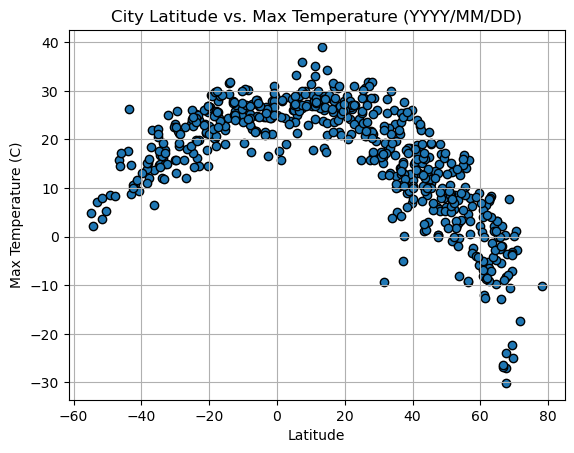

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (YYYY/MM/DD)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

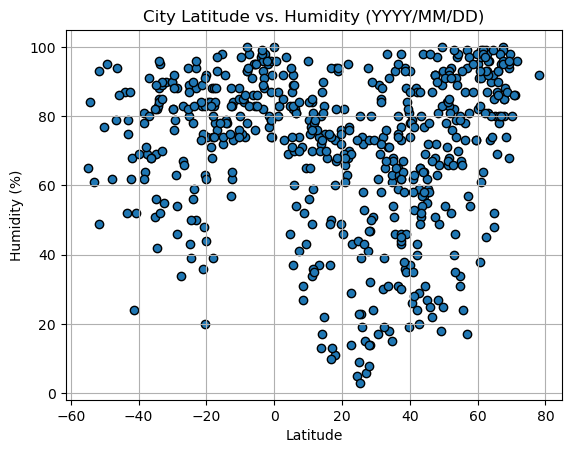

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (YYYY/MM/DD)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

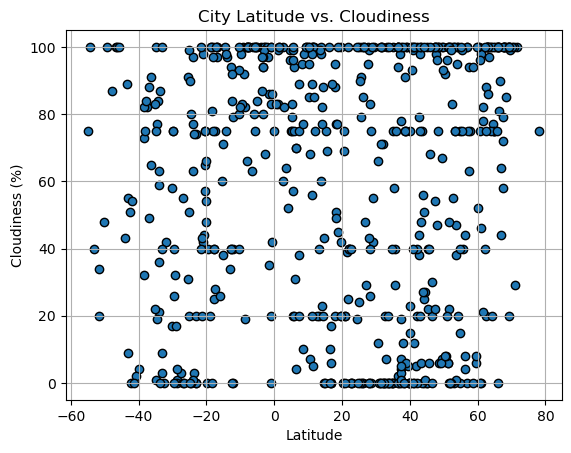

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

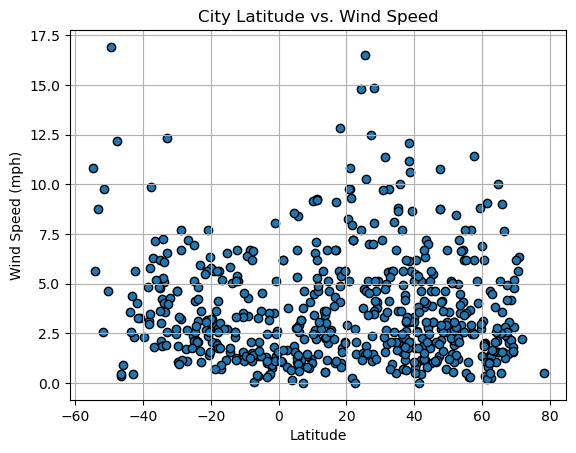

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


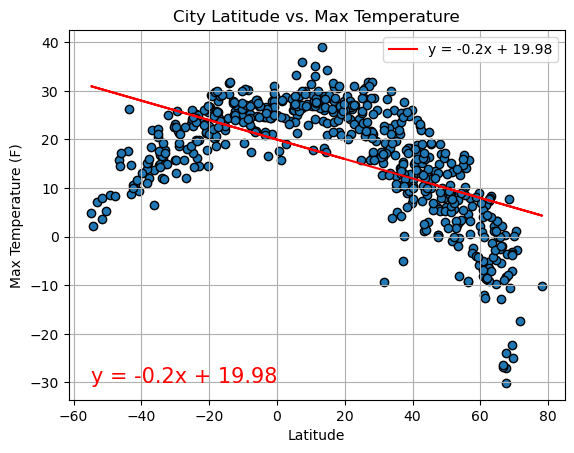

In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors='black')
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate the line equation
    plt.annotate(line_eq, (x_values.min(),y_values.min()), fontsize=15, color="red")

    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()
    
plot_linear_regression(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temperature (F)', 'City Latitude vs. Max Temperature')


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-francois,46.4154,3.9054,5.69,87,20,1.03,FR,1712701974
1,olonkinbyen,70.9221,-8.7187,-2.80,86,29,6.32,SJ,1712701737
2,dudinka,69.4058,86.1778,-22.25,96,100,5.18,RU,1712701757
5,ilulissat,69.2167,-51.1000,-6.99,68,20,1.54,GL,1712701704
7,heroica matamoros,25.8833,-97.5000,30.57,74,100,10.29,MX,1712701888


In [16]:
# Create a DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,3.58,93,34,2.56,CL,1712701975
4,singaparna,-7.3515,108.1110,22.18,98,100,0.07,ID,1712701975
6,waitangi,-43.9535,-176.5597,17.68,87,43,3.58,NZ,1712701976
8,port-aux-francais,-49.3500,70.2167,8.49,95,100,16.92,TF,1712701977
11,grytviken,-54.2811,-36.5092,2.28,84,100,5.66,GS,1712701978


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7157634553989055


Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

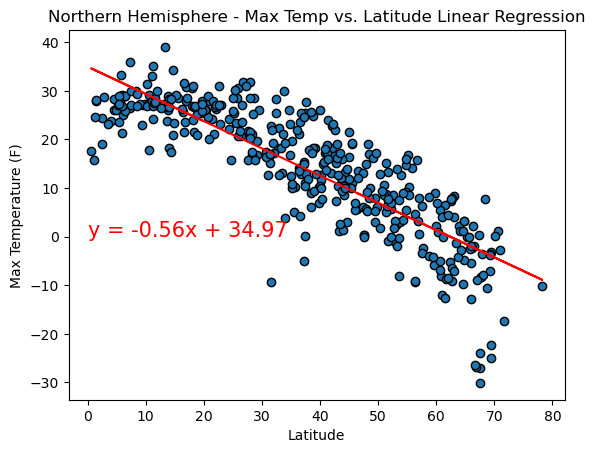

In [17]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Northern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0, 0),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

The r-squared is: 0.5944470582689007


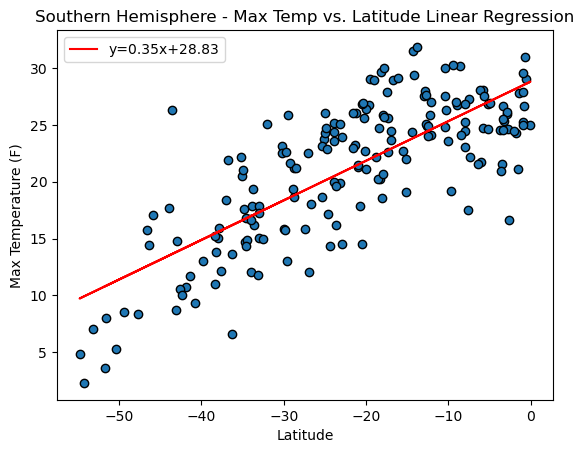

In [18]:
# Linear regression on Southern Hemisphere
# Perform linear regression on Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50, 80),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.060372134710816816


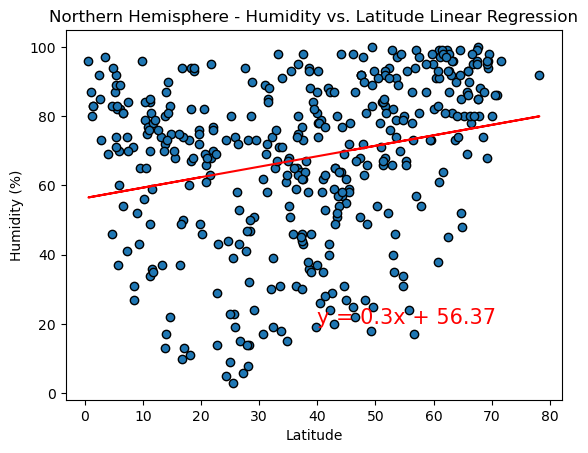

In [19]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Show plot

plt.show()

The r-squared is: 0.09940701654382203


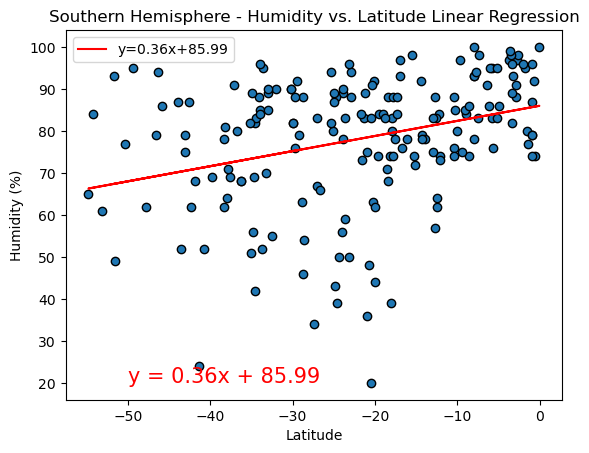

In [20]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005611086670098482


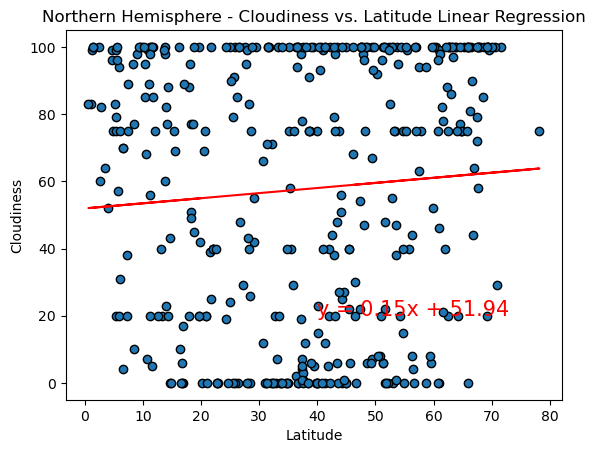

In [23]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Show plot
plt.show()

The r-squared is: 0.08923177421346266


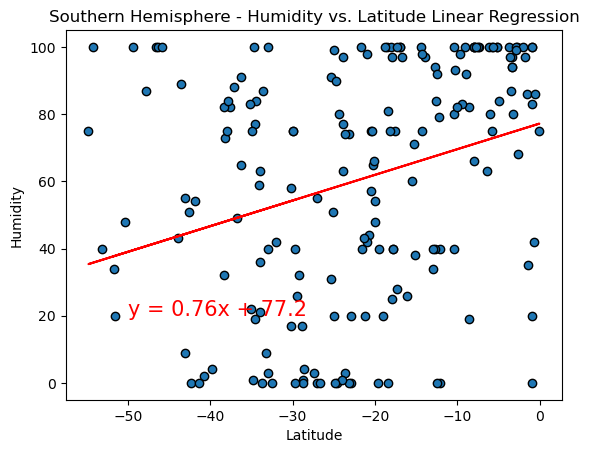

In [25]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009278934746064142


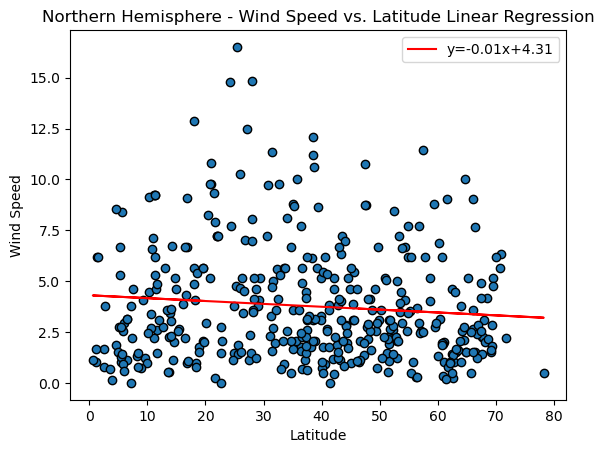

In [26]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Show plot
plt.legend()
plt.show()

The r-squared is: 0.14304903068824956


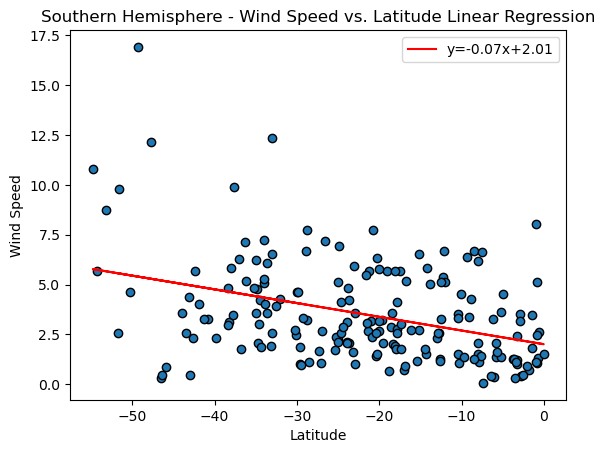

In [27]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE